# Imports

In [2]:
import numpy as np
import time
import sys
import os
import random
from skimage import io
import pandas as pd
from matplotlib import pyplot as plt
from shutil import copyfile

import cv2
import tensorflow as tf
print('import done')

import done


In [6]:
base_path = '/Users/zhangzeyu/Documents/Academic/NEU/Courses/Projects/DeepLearning/Dataset'
images_fname = 'test-images.csv'
annotations_fname = 'test-annotations-bbox.csv'
class_fname = 'class-descriptions-boxable.csv'

In [7]:
images = pd.read_csv(os.path.join(base_path, images_fname))
images.head()

,image_name,image_url
0,a51796b80649e29b.jpg,https://requestor-proxy.figure-eight.com/figur...
1,4c0a784065138975.jpg,https://requestor-proxy.figure-eight.com/figur...
2,63d0fdd8bdcdfc05.jpg,https://requestor-proxy.figure-eight.com/figur...
3,6dca9eeb498da6bc.jpg,https://requestor-proxy.figure-eight.com/figur...
4,fda39fca8c499806.jpg,https://requestor-proxy.figure-eight.com/figur...


In [8]:
annotations = pd.read_csv(os.path.join(base_path, annotations_fname))
annotations.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,000026e7ee790996,xclick,/m/07j7r,1,0.071875,0.145313,0.206250,0.391667,0,1,1,0,0
1,000026e7ee790996,xclick,/m/07j7r,1,0.439063,0.571875,0.264583,0.435417,0,1,1,0,0
2,000026e7ee790996,xclick,/m/07j7r,1,0.668750,1.000000,0.000000,0.552083,0,1,1,0,0
3,000062a39995e348,xclick,/m/015p6,1,0.206208,0.849224,0.154639,1.000000,0,0,0,0,0
4,000062a39995e348,xclick,/m/05s2s,1,0.137472,0.376940,0.000000,0.883652,1,1,0,0,0


In [13]:
class_desc = pd.read_csv(os.path.join(base_path, class_fname))
class_desc.head()

,name,class
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football


# Person subset

In [14]:
# Find the label_name for 'Person', 'Mobile Phone' and 'Car' classes
person_pd = class_desc[class_desc['class']=='Person']
label_name_person = person_pd['name'].values[0]
person_bbox = annotations[annotations['LabelName']==label_name_person]

In [18]:
print('There are %d persons in the dataset' %(len(person_bbox)))
person_img_id = person_bbox['ImageID']
person_img_id = np.unique(person_img_id)

There are 53385 persons in the dataset


In [20]:
# Shuffle the ids and pick the first 1000 ids
copy_person_id = person_img_id.copy()
random.seed(1)
random.shuffle(copy_person_id)

n = 1000
subperson_img_id = copy_person_id[:n]

In [22]:
subperson_img_url = [images[images['image_name']==name+'.jpg'] for name in subperson_img_id]

In [23]:
subperson_pd = pd.DataFrame()
for i in range(len(subperson_img_url)):
    subperson_pd = subperson_pd.append(subperson_img_url[i], ignore_index = True)
subperson_pd.to_csv(os.path.join(base_path, 'subperson_img_url.csv'))

In [24]:
subperson_img_url = [url['image_url'].values[0] for url in subperson_img_url]
subperson_img_url = subperson_pd['image_url'].values

In [34]:
saved_dir = os.path.join(base_path,'Person')

In [35]:
# Download images
# Create the directory
# os.mkdir(saved_dir)
for url in subperson_img_url:
    # print(url)
    img = io.imread(url)
    saved_path = os.path.join(saved_dir, url[-20:])
    io.imsave(saved_path, img)

# Download complete, now visualize it

In [38]:
subperson_pd

,image_name,image_url
0,a51796b80649e29b.jpg,https://requestor-proxy.figure-eight.com/figur...
1,4c0a784065138975.jpg,https://requestor-proxy.figure-eight.com/figur...
2,63d0fdd8bdcdfc05.jpg,https://requestor-proxy.figure-eight.com/figur...
3,6dca9eeb498da6bc.jpg,https://requestor-proxy.figure-eight.com/figur...
4,fda39fca8c499806.jpg,https://requestor-proxy.figure-eight.com/figur...
...,...,...
125431,7faa800e5224e43b.jpg,https://requestor-proxy.figure-eight.com/figur...
125432,7ecf536f88270a93.jpg,https://requestor-proxy.figure-eight.com/figur...
125433,ea8304d584aaa1ae.jpg,https://requestor-proxy.figure-eight.com/figur...
125434,c5b7b69c319bb0d5.jpg,https://requestor-proxy.figure-eight.com/figur...


In [47]:
img_name = subperson_pd['image_name'][2]
img_url = subperson_pd['image_url'][2]
print('\t image_name: %s' % (img_name))
print('\t img_url: %s' % (img_url))
img = io.imread(img_url)

	 image_name: 6e2276528e6363e2.jpg
	 img_url: https://requestor-proxy.figure-eight.com/figure_eight_datasets/open-images/test/6e2276528e6363e2.jpg


(768, 1024, 3)


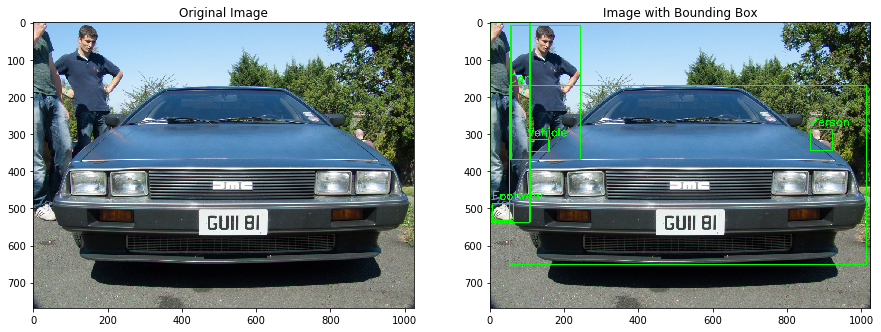

In [48]:
height, width, _ = img.shape
print(img.shape)
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img)
img_id = img_name[:16]
bboxs = annotations[annotations['ImageID']==img_id]
img_bbox = img.copy()
for index, row in bboxs.iterrows():
    xmin = row['XMin']
    xmax = row['XMax']
    ymin = row['YMin']
    ymax = row['YMax']
    xmin = int(xmin*width)
    xmax = int(xmax*width)
    ymin = int(ymin*height)
    ymax = int(ymax*height)
    label_name = row['LabelName']
    class_series = class_desc[class_desc['name']==label_name]
    class_name = class_series['class'].values[0]
    cv2.rectangle(img_bbox,(xmin,ymin),(xmax,ymax),(0,255,0),2)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img_bbox,class_name,(xmin,ymin-10), font, 1,(0,255,0),2)
plt.subplot(1,2,2)
plt.title('Image with Bounding Box')
plt.imshow(img_bbox)
plt.show()

# Train and test preparation

In [49]:
# Save images to train and test directory
train_path = os.path.join(base_path, 'train')
os.mkdir(train_path)
test_path = os.path.join(base_path, 'test')
os.mkdir(test_path)

In [51]:
classe = 'Person'
all_imgs = os.listdir(os.path.join(base_path, classe))
all_imgs = [f for f in all_imgs if not f.startswith('.')]
random.seed(1)
random.shuffle(all_imgs)

train_imgs = all_imgs[:800]
test_imgs = all_imgs[800:]

# Copy each classes' images to train directory
for j in range(len(train_imgs)):
    original_path = os.path.join(os.path.join(base_path, classe), train_imgs[j])
    new_path = os.path.join(train_path, train_imgs[j])
    copyfile(original_path, new_path)

# Copy each classes' images to test directory
for j in range(len(test_imgs)):
    original_path = os.path.join(os.path.join(base_path, classe), test_imgs[j])
    new_path = os.path.join(test_path, test_imgs[j])
    copyfile(original_path, new_path)

In [52]:
print('number of training images: ', len(os.listdir(train_path))) # subtract one because there is one hidden file named '.DS_Store'
print('number of test images: ', len(os.listdir(test_path)))

number of training images:  800
number of test images:  200


In [53]:
train_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
train_imgs = os.listdir(train_path)
train_imgs = [name for name in train_imgs if not name.startswith('.')]

In [59]:
for i in range(len(train_imgs)):
    sys.stdout.write('Parse train_imgs ' + str(i) + '; Number of boxes: ' + str(len(train_df)) + '\r')
    sys.stdout.flush()
    img_name = train_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations[annotations['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        if labelName == label_name_person:
            train_df = train_df.append({'FileName': img_name, 
                                        'XMin': row['XMin'], 
                                        'XMax': row['XMax'], 
                                        'YMin': row['YMin'], 
                                        'YMax': row['YMax'], 
                                        'ClassName': classe}, 
                                       ignore_index=True)

### test images

In [60]:
test_df = pd.DataFrame(columns=['FileName', 'XMin', 'XMax', 'YMin', 'YMax', 'ClassName'])

# Find boxes in each image and put them in a dataframe
test_imgs = os.listdir(test_path)
test_imgs = [name for name in test_imgs if not name.startswith('.')]

In [63]:

for i in range(len(test_imgs)):
    sys.stdout.write('Parse test_imgs ' + str(i) + '; Number of boxes: ' + str(len(test_df)) + '\r')
    sys.stdout.flush()
    img_name = test_imgs[i]
    img_id = img_name[0:16]
    tmp_df = annotations[annotations['ImageID']==img_id]
    for index, row in tmp_df.iterrows():
        labelName = row['LabelName']
        if labelName == label_name_person:
            test_df = test_df.append({'FileName': img_name, 
                                        'XMin': row['XMin'], 
                                        'XMax': row['XMax'], 
                                        'YMin': row['YMin'], 
                                        'YMax': row['YMax'], 
                                        'ClassName': classe}, 
                                       ignore_index=True)

### save temp files

In [64]:
train_df.to_csv(os.path.join(base_path, 'train.csv'))
test_df.to_csv(os.path.join(base_path, 'test.csv'))

In [66]:
# print(train_df.head())
train_df = pd.read_csv(os.path.join(base_path, 'train.csv'))

# For training
f= open(base_path + "/annotation.txt","w+")
for idx, row in train_df.iterrows():
#     sys.stdout.write(str(idx) + '\r')
#     sys.stdout.flush()
    img = cv2.imread((base_path + '/train/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    file_path = '/Users/zhangzeyu/Documents/Academic/NEU/Courses/Projects/DeepLearning/Dataset/train'
    fileName = os.path.join(file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()

In [67]:
# For test
f= open(base_path + "/test_annotation.txt","w+")
for idx, row in test_df.iterrows():
    sys.stdout.write(str(idx) + '\r')
    sys.stdout.flush()
    img = cv2.imread((base_path + '/test/' + row['FileName']))
    height, width = img.shape[:2]
    x1 = int(row['XMin'] * width)
    x2 = int(row['XMax'] * width)
    y1 = int(row['YMin'] * height)
    y2 = int(row['YMax'] * height)
    
    file_path = '/Users/zhangzeyu/Documents/Academic/NEU/Courses/Projects/DeepLearning/Dataset/test'
    fileName = os.path.join(file_path, row['FileName'])
    className = row['ClassName']
    f.write(fileName + ',' + str(x1) + ',' + str(y1) + ',' + str(x2) + ',' + str(y2) + ',' + className + '\n')
f.close()